In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import export_graphviz
%matplotlib inline

In [2]:
# Importing Data
data_v1 = pd.read_csv('Churn+Case+Data+UVAQA0806X.csv')
data_v1.head()

,ID,Customer Age (in months),"Churn (1 = Yes, 0 = No)",CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
0,1,67.0,-,-,-,-,-,-,-,-,-,-,31.0
1,2,67.0,-,62.0,4.0,-,-,-,-,-,-,(16.0),31.0
2,3,55.0,-,-,-,-,-,-,-,-,-,-,31.0
3,4,63.0,-,231.0,1.0,1.0,(1.0),3.0,-,167.0,(8.0),"21,996.0",-
4,5,57.0,-,43.0,(1.0),-,-,-,-,-,-,9.0,31.0


In [3]:
# Data Cleaning
# Replacing " -   " values with "0"
data_v1=data_v1.replace(" -   ","0")

# Correcting -ve numbers' format
var = data_v1.columns
for v in var:
    data_v1[v] = (data_v1[v].replace("[\$,)]","", regex=True ).replace("[(]","-",regex=True).astype(float).astype(int))

data_v1.head()

,ID,Customer Age (in months),"Churn (1 = Yes, 0 = No)",CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
0,1,67,0,0,0,0,0,0,0,0,0,0,31
1,2,67,0,62,4,0,0,0,0,0,0,-16,31
2,3,55,0,0,0,0,0,0,0,0,0,0,31
3,4,63,0,231,1,1,-1,3,0,167,-8,21996,0
4,5,57,0,43,-1,0,0,0,0,0,0,9,31


In [4]:
# Data Types
data_v1.dtypes

ID                            int64
Customer Age (in months)      int64
Churn (1 = Yes, 0 = No)       int64
CHI Score Month 0             int64
CHI Score 0-1                 int64
Support Cases Month 0         int64
Support Cases 0-1             int64
SP Month 0                    int64
SP 0-1                        int64
Logins 0-1                    int64
Blog Articles 0-1             int64
Views 0-1                     int64
 Days Since Last Login 0-1    int64
dtype: object

In [5]:
# Dimensions
data_v1.shape

(6347, 13)

In [6]:
# Columns Renaming
data_v1=data_v1.rename(columns = {'Churn (1 = Yes, 0 = No)':'Churn',
                                  'CHI Score Month 0':'CHI - Current Month',
                                  'CHI Score 0-1':'CHI - Change',
                                  'Support Cases Month 0':'Support Cases - Current Month',
                                  'Support Cases 0-1':'Support Cases - Change',
                                  'SP Month 0':'Support Priority - Current Month',
                                  'SP 0-1':'Support Priority - Change',
                                  'Logins 0-1':'Logins - Change',
                                  'Blog Articles 0-1':'Blogs - Change',
                                  'Views 0-1':'Views - Change',
                                  ' Days Since Last Login 0-1':'Days Since Last Login - Change'
                                 })

In [7]:
# Exploratory Data Analysis
data_v1.describe()

,ID,Customer Age (in months),Churn,CHI - Current Month,CHI - Change,Support Cases - Current Month,Support Cases - Change,Support Priority - Current Month,Support Priority - Change,Logins - Change,Blogs - Change,Views - Change,Days Since Last Login - Change
count,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,3174.000000,13.896802,0.050890,87.316685,5.058610,0.706318,-0.006932,0.796597,0.028990,15.727903,0.157240,96.310540,1.764613
std,1832.365411,11.160078,0.219791,66.282788,30.828767,1.723961,1.870942,1.300828,1.441291,42.119061,4.660607,3152.411673,17.966020
min,1.000000,0.000000,0.000000,0.000000,-125.000000,0.000000,-29.000000,0.000000,-4.000000,-293.000000,-75.000000,-28322.000000,-648.000000
25%,1587.500000,5.000000,0.000000,24.500000,-8.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-11.000000,0.000000
50%,3174.000000,11.000000,0.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,4760.500000,20.000000,0.000000,139.000000,15.000000,1.000000,0.000000,2.000000,0.000000,23.000000,0.000000,27.000000,3.000000
max,6347.000000,67.000000,1.000000,298.000000,208.000000,32.000000,31.000000,4.000000,4.000000,865.000000,217.000000,230414.000000,61.000000


In [8]:
#Check missing
data_v1.apply(lambda x: sum(x.isnull()))

ID                                  0
Customer Age (in months)            0
Churn                               0
CHI - Current Month                 0
CHI - Change                        0
Support Cases - Current Month       0
Support Cases - Change              0
Support Priority - Current Month    0
Support Priority - Change           0
Logins - Change                     0
Blogs - Change                      0
Views - Change                      0
Days Since Last Login - Change      0
dtype: int64

In [9]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [10]:
#Binning age:
cut_points = [7,14,21,28,35,42]
labels = ["0-7","8-14","15-21","22-28","29-35","36-42","43+"]
data_v1["Customer_Age_Bin (in months)"] = binning(data_v1["Customer Age (in months)"], cut_points,labels)
print (pd.value_counts(data_v1["Customer_Age_Bin (in months)"], sort=False))

0-7      2310
8-14     1643
15-21     986
22-28     629
29-35     438
36-42     192
43+       149
Name: Customer_Age_Bin (in months), dtype: int64


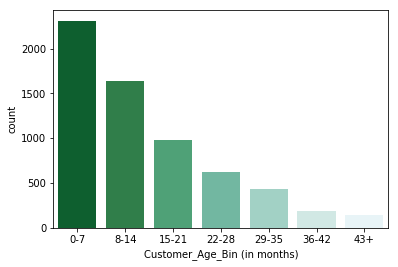

In [11]:
# Total customers within bins
sns.countplot(x='Customer_Age_Bin (in months)',data=data_v1,palette="BuGn_r")

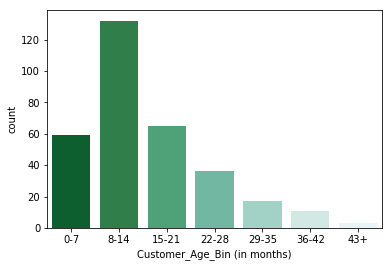

In [12]:
# Total churned customers within bins
sns.countplot(x='Customer_Age_Bin (in months)',data=data_v1[data_v1["Churn"]==1],palette="BuGn_r")

In [13]:
# Calculating Churn Rate
P = data_v1.groupby('Customer_Age_Bin (in months)')['Churn'].count().reset_index()
Q = data_v1[data_v1["Churn"]==1].groupby('Customer_Age_Bin (in months)')['Churn'].count().reset_index()
temp=pd.merge(P,Q,how='inner',on='Customer_Age_Bin (in months)')
temp['Churn Rate (%)']=(temp.Churn_y/temp.Churn_x)*100
temp

,Customer_Age_Bin (in months),Churn_x,Churn_y,Churn Rate (%)
0,0-7,2310,59,2.554113
1,8-14,1643,132,8.034084
2,15-21,986,65,6.592292
3,22-28,629,36,5.723370
4,29-35,438,17,3.881279
5,36-42,192,11,5.729167
6,43+,149,3,2.013423


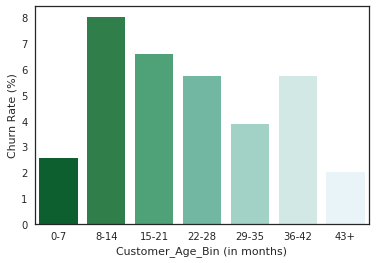

In [14]:
# Churn Rate within bins
sns.set(style="white")
sns.barplot(x="Customer_Age_Bin (in months)", y="Churn Rate (%)", data=temp,palette='BuGn_r')

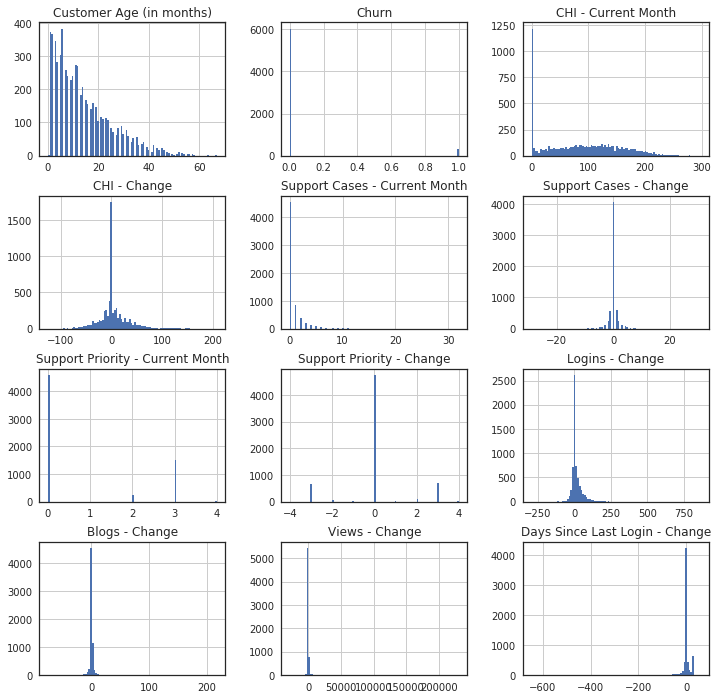

In [15]:
# Variable Distributions (Overall)
fig, axes = plt.subplots(4,3,figsize=(12,12))

i = 1
for triaxis in axes:
    for axis in triaxis:
        data_v1.hist(column = data_v1.columns[i], bins = 100, ax=axis)
        i = i+1

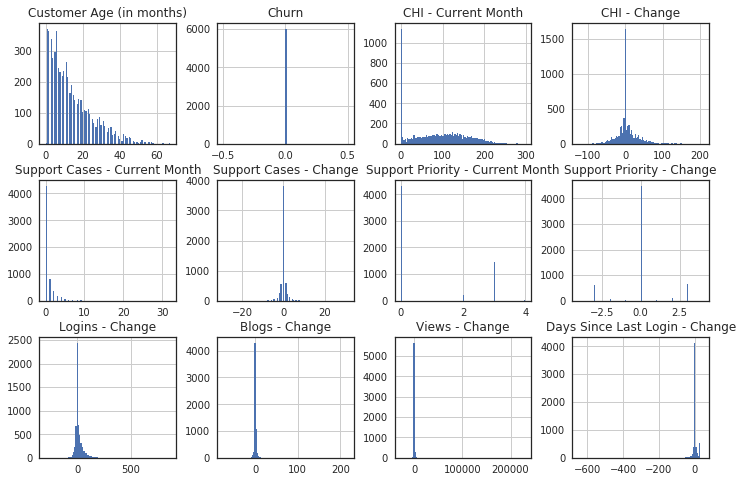

In [16]:
# Variable Distributions (non-churners)
fig, axes = plt.subplots(3,4,figsize=(12,8))
#fig, axes = plt.subplots(4,3,figsize=(12,12))

i = 1
for triaxis in axes:
    for axis in triaxis:
        data_v1[data_v1['Churn']==0].hist(column = data_v1.columns[i], bins = 100, ax=axis)
        i = i+1

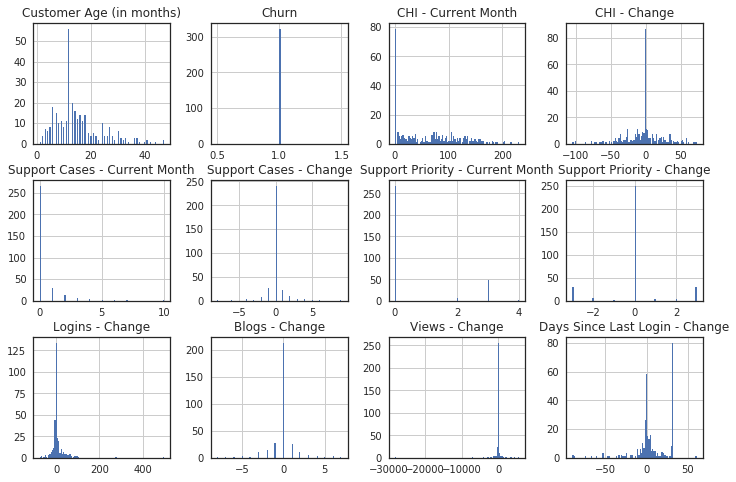

In [17]:
# Variable Distributions (churners)
fig, axes = plt.subplots(3,4,figsize=(12,8))

i = 1
for triaxis in axes:
    for axis in triaxis:
        data_v1[data_v1['Churn']==1].hist(column = data_v1.columns[i], bins = 100, ax=axis)
        i = i+1

Text(0.5,1.05,'Distribution of "Customer Age (in months)" for Non-Churners')

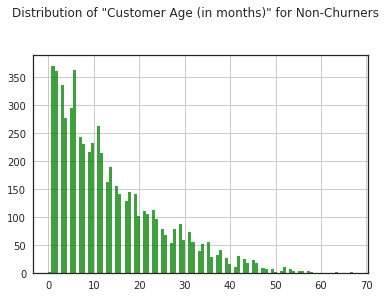

In [18]:
# Distribution of "Customer Age (in months)" for Non-Churners
data_v1[data_v1['Churn']==0]['Customer Age (in months)'].hist(bins=100,facecolor='g',alpha=0.75)
plt.suptitle('Distribution of "Customer Age (in months)" for Non-Churners', x=0.5, y=1.05, ha='center', fontsize='medium')

Text(0.5,1.05,'Distribution of "Customer Age (in months)" for Churners')

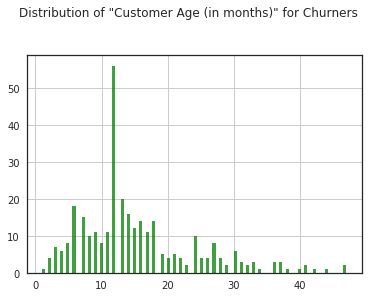

In [19]:
# Distribution of "Customer Age (in months)" for Churners
data_v1[data_v1['Churn']==1]['Customer Age (in months)'].hist(bins=100,facecolor='g',alpha=0.75)
plt.suptitle('Distribution of "Customer Age (in months)" for Churners', x=0.5, y=1.05, ha='center', fontsize='medium')

Text(0.5,1.05,'Distribution of "Days Since Last Login - Change" for non-churners')

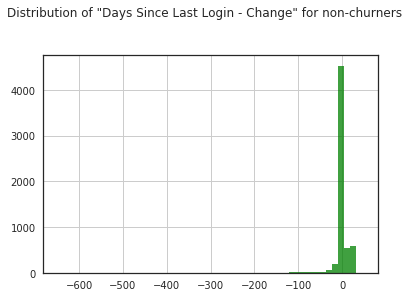

In [20]:
# Distribution of Days Since Last Login - Change' for non churners
#sns.distplot(data_v1[data_v1['Churn']==0]['Days Since Last Login - Change']
#             ,kde=False,color="green")
data_v1[data_v1['Churn']==0]['Days Since Last Login - Change'].hist(bins=50,facecolor='g',alpha=0.75)
plt.suptitle('Distribution of "Days Since Last Login - Change" for non-churners', x=0.5, y=1.05, ha='center', fontsize='medium')

Text(0.5,1.05,'Distribution of "Days Since Last Login - Change" for churners')

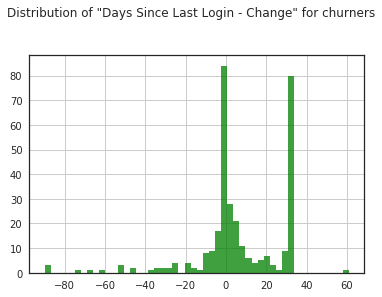

In [21]:
# Distribution of Days Since Last Login - Change' for churners
#sns.distplot(data_v1[data_v1['Churn']==1]['Days Since Last Login - Change'],
#             kde=False,color="green")
data_v1[data_v1['Churn']==1]['Days Since Last Login - Change'].hist(bins=50,facecolor='g',alpha=0.75)
plt.suptitle('Distribution of "Days Since Last Login - Change" for churners', x=0.5, y=1.05, ha='center', fontsize='medium')

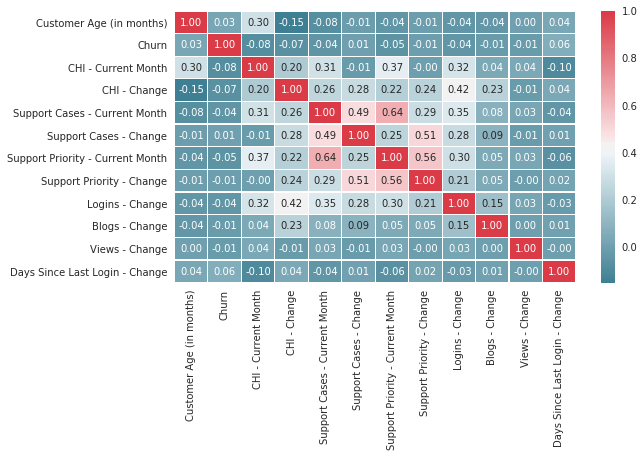

In [22]:
#Correlation Plot
plt.figure(figsize = (9,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data_v1.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]]
            .corr(),linewidths=.3,cmap=cmap,annot=True,fmt='.2f',annot_kws={"size": 10})

In [23]:
# Defining Features and Target
X=data_v1[['Customer Age (in months)','CHI - Current Month','CHI - Change',
                 'Support Cases - Current Month','Support Cases - Change','Support Priority - Current Month',
                 'Support Priority - Change', 'Logins - Change', 'Blogs - Change','Views - Change',
                 'Days Since Last Login - Change']]  # Features
Y=data_v1['Churn']  # Labels

In [24]:
# Train and Test split
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=100)

/opt/python/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
# Feature scaling
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.fit_transform(x_test)

In [26]:
# LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred.sum()

0

Confusion matrix:
 [[1517    0]
 [  70    0]]


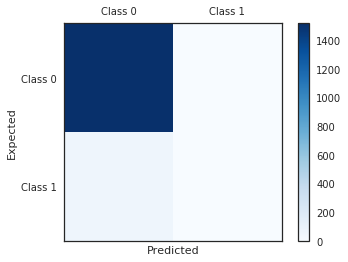

In [28]:
# Checking model performance metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [29]:
# Since the class is highly unbalanced ; we will try undersampling or oversampling

Class 0: 6024
Class 1: 323
Proportion: 18.65 : 1


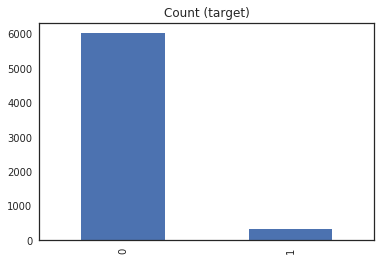

In [30]:
target_count = data_v1["Churn"].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [31]:
# Class count
count_class_0, count_class_1 = data_v1["Churn"].value_counts()

# Divide by class
df_class_0 = data_v1[data_v1["Churn"] == 0]
df_class_1 = data_v1[data_v1["Churn"] == 1]

Random under-sampling:
1    323
0    323
Name: Churn, dtype: int64


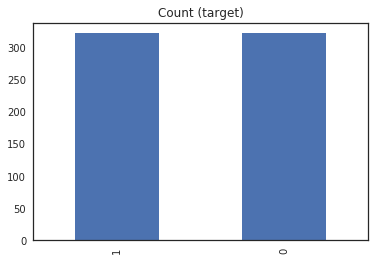

In [32]:
# Trying under-sampling

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under["Churn"].value_counts())

df_test_under["Churn"].value_counts().plot(kind='bar', title='Count (target)');

Random over-sampling:
1    6024
0    6024
Name: Churn, dtype: int64


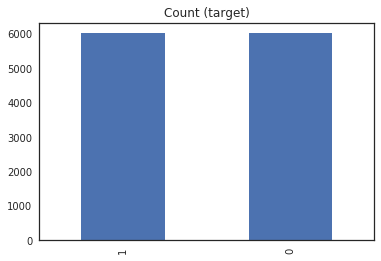

In [33]:
# Trying over-sampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over["Churn"].value_counts())

df_test_over["Churn"].value_counts().plot(kind='bar', title='Count (target)');

In [34]:
# Defining Features and Target on over-sampling data
X_os=df_test_over[['Customer Age (in months)','CHI - Current Month','CHI - Change',
                 'Support Cases - Current Month','Support Cases - Change','Support Priority - Current Month',
                 'Support Priority - Change', 'Logins - Change', 'Blogs - Change','Views - Change',
                 'Days Since Last Login - Change']]  # Features
Y_os=df_test_over['Churn']  # Labels

In [35]:
# Train - Test Split
x_train,x_test,y_train,y_test = train_test_split(X_os,Y_os,test_size=0.25,random_state=100)

In [36]:
# LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred.sum()

1500

Confusion matrix:
 [[847 630]
 [665 870]]


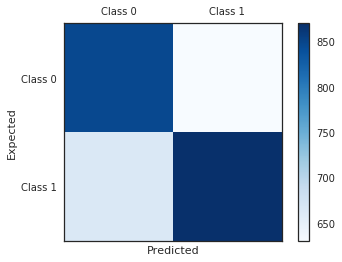

0.5700531208499336


In [38]:
# Checking model performance metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
from sklearn import metrics
print (metrics.accuracy_score(y_test,classifier.predict(x_test)))

In [39]:
# LogisticRegression gave ~60% accuracy on overall dataset

In [40]:
# DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=10,max_leaf_nodes=10,random_state=100)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [41]:
# Exporting graph data for vizualization
export_graphviz(dtree, out_file='dtree.dot', feature_names = X.columns,
                class_names = ('0','1'),rounded = True, proportion = False, precision = 2, filled = True)

In [42]:
# Predicting the Test set results
y_pred = dtree.predict(x_test)
y_pred.sum()

923

Confusion matrix:
 [[1284  193]
 [ 805  730]]


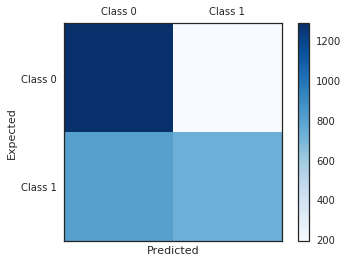

0.6686586985391766


In [43]:
# Checking model performance metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
from sklearn import metrics
print (metrics.accuracy_score(y_test,dtree.predict(x_test)))

In [38]:
# DecisionTreeClassifier gave ~70% accuracy on overall dataset

In [44]:
# feature_importances_
for name, importance in zip(X.columns, dtree.feature_importances_):
    print(name, importance)

Customer Age (in months) 0.21078929181220704
CHI - Current Month 0.21060408887488433
CHI - Change 0.11281675422796208
Support Cases - Current Month 0.0
Support Cases - Change 0.0
Support Priority - Current Month 0.03706827316520062
Support Priority - Change 0.0
Logins - Change 0.09476414299036694
Blogs - Change 0.0
Views - Change 0.0
Days Since Last Login - Change 0.333957448929379


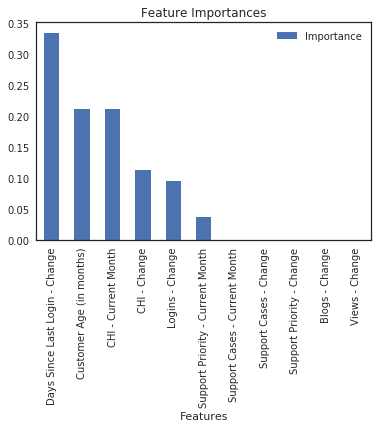

In [45]:
Var_Imp = pd.DataFrame(dict(Features = X.columns, Importance = dtree.feature_importances_))
Var_Imp_sort = Var_Imp.sort_values("Importance",ascending=False)
Var_Imp_sort
Var_Imp_sort.plot(x='Features',kind='bar', title='Feature Importances')

In [46]:
# Subsetting Risky Customers #

In [47]:
#Initial  Counts
print (data_v1.shape)
print (data_v1[data_v1['Churn']==1].shape)

(6347, 14)
(323, 14)


In [48]:
# Subsetting based on risky customers
data_risky_customers=data_v1[((data_v1['Days Since Last Login - Change']>17.5)
                              & (data_v1['Logins - Change']<=2.5))
                            | ((data_v1['Days Since Last Login - Change']<=17.5)
                              & (data_v1['Customer Age (in months)']>4.5))]
print (data_risky_customers.shape)
print (data_risky_customers[data_risky_customers['Churn']==1].shape)

(4759, 14)
(295, 14)


In [49]:
# Class count
count_class_0, count_class_1 = data_risky_customers["Churn"].value_counts()

# Divide by class
df_class_0 = data_risky_customers[data_risky_customers["Churn"] == 0]
df_class_1 = data_risky_customers[data_risky_customers["Churn"] == 1]

Random over-sampling:
1    4464
0    4464
Name: Churn, dtype: int64


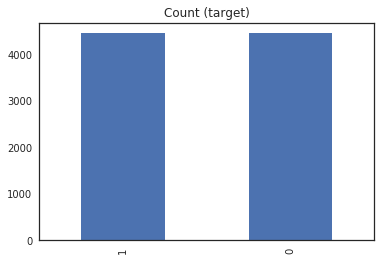

In [50]:
# Trying overr-sampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
data_risky_customers_over_samp = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(data_risky_customers_over_samp["Churn"].value_counts())

data_risky_customers_over_samp["Churn"].value_counts().plot(kind='bar', title='Count (target)');

In [51]:
# Defining Features and Target on over-sampling data
X_rc=data_risky_customers_over_samp[['Customer Age (in months)','CHI - Current Month','CHI - Change',
                 'Support Cases - Current Month','Support Cases - Change','Support Priority - Current Month',
                 'Support Priority - Change', 'Logins - Change', 'Blogs - Change','Views - Change',
                 'Days Since Last Login - Change','ID']]  # Features
Y_rc=data_risky_customers_over_samp[['Churn']]  # Labels

In [52]:
# Train - Test Split
from sklearn.cross_validation import train_test_split
x_train_temp,x_test_temp,y_train,y_test = train_test_split(X_rc,Y_rc,test_size=0.30,random_state=100)

In [53]:
x_train_temp.head()

,Customer Age (in months),CHI - Current Month,CHI - Change,Support Cases - Current Month,Support Cases - Change,Support Priority - Current Month,Support Priority - Change,Logins - Change,Blogs - Change,Views - Change,Days Since Last Login - Change,ID
1717,17,160,-20,0,0,0,0,-10,-5,-92,0,1718
635,15,148,28,0,0,0,0,5,1,-2,-4,636
4302,6,50,-20,0,0,0,0,-10,0,8,-2,4303
1009,14,0,-23,0,0,0,0,-2,0,993,-83,1010
4454,6,159,0,1,1,3,3,57,1,5664,0,4455


In [54]:
x_train_std_temp=x_train_temp.copy()
x_test_std_temp=x_test_temp.copy()
pd.options.mode.chained_assignment = None

In [55]:
from sklearn.preprocessing import StandardScaler
x_train_std_temp[['Customer Age (in months)','CHI - Current Month','CHI - Change',
                 'Support Cases - Current Month','Support Cases - Change','Support Priority - Current Month',
                 'Support Priority - Change', 'Logins - Change', 'Blogs - Change','Views - Change',
                 'Days Since Last Login - Change']] = StandardScaler().fit_transform(x_train_std_temp[['Customer Age (in months)','CHI - Current Month','CHI - Change',
                 'Support Cases - Current Month','Support Cases - Change','Support Priority - Current Month',
                 'Support Priority - Change', 'Logins - Change', 'Blogs - Change','Views - Change',
                 'Days Since Last Login - Change']])
x_test_std_temp[['Customer Age (in months)','CHI - Current Month','CHI - Change',
                 'Support Cases - Current Month','Support Cases - Change','Support Priority - Current Month',
                 'Support Priority - Change', 'Logins - Change', 'Blogs - Change','Views - Change',
                 'Days Since Last Login - Change']] = StandardScaler().fit_transform(x_test_std_temp[['Customer Age (in months)','CHI - Current Month','CHI - Change',
                 'Support Cases - Current Month','Support Cases - Change','Support Priority - Current Month',
                 'Support Priority - Change', 'Logins - Change', 'Blogs - Change','Views - Change',
                 'Days Since Last Login - Change']])

In [56]:
x_train=x_train_temp.copy()
x_train.drop(['ID'], axis=1, inplace=True)
#print(x_train_temp.shape)
#print(x_train.shape)

x_train_std=x_train_std_temp.copy()
x_train_std.drop(['ID'], axis=1, inplace=True)
#print(x_train_std_temp.shape)
#print(x_train_std.shape)

x_test=x_test_temp.copy()
x_test.drop(['ID'], axis=1, inplace=True)
#print(x_test_temp.shape)
#print(x_test.shape)

x_test_std=x_test_std_temp.copy()
x_test_std.drop(['ID'], axis=1, inplace=True)
#print(x_test_std_temp.shape)
#print(x_test_std.shape)

In [57]:
# RandomForestClassifier
#from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier(random_state = 0)

#from sklearn.tree import DecisionTreeClassifier
#dtree=DecisionTreeClassifier(max_depth=10,max_leaf_nodes=10,random_state=111)

rfc=XGBClassifier(random_state = 211,n_estimators=100,max_depth=30,reg_alpha=20,learning_rate=0.5)
rfc.fit(x_train_std, np.ravel(y_train))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=30, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=211, reg_alpha=20, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [58]:
# Predicting the Test set results
y_pred = rfc.predict(x_test_std)
y_pred.sum()

/opt/python/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1251

Confusion matrix:
 [[1102  221]
 [ 326 1030]]


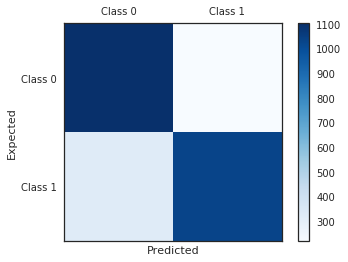

0.795819335572975


/opt/python/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [59]:
# Checking model performance metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
from sklearn import metrics
print (metrics.accuracy_score(y_test,rfc.predict(x_test_std)))

In [60]:
# feature_importances_
for name, importance in zip(X.columns, rfc.feature_importances_):
    print(name, importance)

Customer Age (in months) 0.15588723
CHI - Current Month 0.15754561
CHI - Change 0.1509121
Support Cases - Current Month 0.016583748
Support Cases - Change 0.026533997
Support Priority - Current Month 0.0049751243
Support Priority - Change 0.019900497
Logins - Change 0.11774461
Blogs - Change 0.04477612
Views - Change 0.1708126
Days Since Last Login - Change 0.13432837


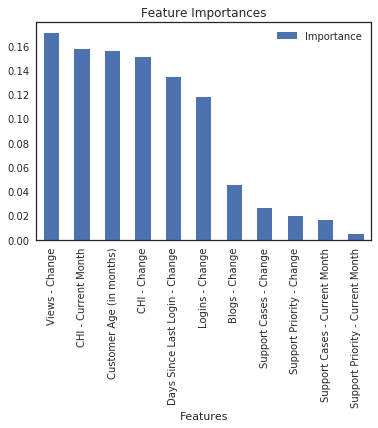

In [61]:
Var_Imp = pd.DataFrame(dict(Features = X.columns, Importance = rfc.feature_importances_))
Var_Imp_sort = Var_Imp.sort_values("Importance",ascending=False)
Var_Imp_sort
Var_Imp_sort.plot(x='Features',kind='bar', title='Feature Importances')

In [62]:
x_test_temp_1=x_test_temp.copy()
x_test_temp_1['probability_1']=pd.Series(rfc.predict_proba(x_test_std)[:, [1]].reshape(-1)
                                         ,index=x_test_temp_1.index)
#print (x_test_temp_1.shape)
#x_test_temp_1.head(5)

y_test_updated = y_test.copy()
y_test_updated = y_test_updated[~y_test_updated.index.duplicated(keep='last')]
#print (y_test_updated.shape)
#y_test_updated.head(5)

x_test_temp_2 = x_test_temp_1.join(y_test_updated,how='left')
#print (x_test_temp_2.shape)
x_test_temp_2.drop_duplicates().sort_values('probability_1',ascending=False).head(50)

,Customer Age (in months),CHI - Current Month,CHI - Change,Support Cases - Current Month,Support Cases - Change,Support Priority - Current Month,Support Priority - Change,Logins - Change,Blogs - Change,Views - Change,Days Since Last Login - Change,ID,probability_1,Churn
529,12,26,0,0,0,0,0,0,0,9,31,530,0.942703,0
522,12,0,0,0,0,0,0,0,0,0,31,523,0.934177,1
4499,12,0,0,0,0,0,0,0,0,0,31,4500,0.934177,1
3311,12,0,0,0,0,0,0,0,0,0,31,3312,0.934177,1
3312,12,0,0,0,0,0,0,0,0,0,31,3313,0.934177,1
542,12,0,0,0,0,0,0,0,0,0,31,543,0.934177,1
786,12,0,0,0,0,0,0,0,0,0,31,787,0.934177,1
547,12,0,0,0,0,0,0,0,0,2,31,548,0.934177,1
362,12,0,0,0,0,0,0,0,0,0,31,363,0.934177,1
1759,12,0,0,0,0,0,0,0,0,0,31,1760,0.934177,1


In [63]:
x_test_temp_2[['ID','Churn','probability_1']].to_csv('output.csv',index=False)

In [64]:
x_test_temp_2.shape

(2679, 14)

In [65]:
x_test_std_temp_1=x_test_std_temp.copy()
x_test_std_temp_1['probability_1']=pd.Series(rfc.predict_proba(x_test_std)[:, [1]].reshape(-1)
                                         ,index=x_test_std_temp_1.index)
#print (x_test_temp_1.shape)
#x_test_temp_1.head(5)

y_test_std_updated = y_test.copy()
y_test_std_updated = y_test_std_updated[~y_test_std_updated.index.duplicated(keep='last')]
#print (y_test_updated.shape)
#y_test_updated.head(5)

x_test_std_temp_2 = x_test_std_temp_1.join(y_test_std_updated,how='left')
#print (x_test_temp_2.shape)
x_test_std_temp_2.drop_duplicates().sort_values('probability_1',ascending=False).head(50)

,Customer Age (in months),CHI - Current Month,CHI - Change,Support Cases - Current Month,Support Cases - Change,Support Priority - Current Month,Support Priority - Change,Logins - Change,Blogs - Change,Views - Change,Days Since Last Login - Change,ID,probability_1,Churn
529,-0.468760,-0.952977,0.071455,-0.379231,0.046287,-0.546356,0.065193,-0.259430,0.019010,-0.012424,1.413740,530,0.942703,0
522,-0.468760,-1.362216,0.071455,-0.379231,0.046287,-0.546356,0.065193,-0.259430,0.019010,-0.018501,1.413740,523,0.934177,1
4499,-0.468760,-1.362216,0.071455,-0.379231,0.046287,-0.546356,0.065193,-0.259430,0.019010,-0.018501,1.413740,4500,0.934177,1
3311,-0.468760,-1.362216,0.071455,-0.379231,0.046287,-0.546356,0.065193,-0.259430,0.019010,-0.018501,1.413740,3312,0.934177,1
3312,-0.468760,-1.362216,0.071455,-0.379231,0.046287,-0.546356,0.065193,-0.259430,0.019010,-0.018501,1.413740,3313,0.934177,1
542,-0.468760,-1.362216,0.071455,-0.379231,0.046287,-0.546356,0.065193,-0.259430,0.019010,-0.018501,1.413740,543,0.934177,1
786,-0.468760,-1.362216,0.071455,-0.379231,0.046287,-0.546356,0.065193,-0.259430,0.019010,-0.018501,1.413740,787,0.934177,1
547,-0.468760,-1.362216,0.071455,-0.379231,0.046287,-0.546356,0.065193,-0.259430,0.019010,-0.017150,1.413740,548,0.934177,1
362,-0.468760,-1.362216,0.071455,-0.379231,0.046287,-0.546356,0.065193,-0.259430,0.019010,-0.018501,1.413740,363,0.934177,1
1759,-0.468760,-1.362216,0.071455,-0.379231,0.046287,-0.546356,0.065193,-0.259430,0.019010,-0.018501,1.413740,1760,0.934177,1


In [ ]:
x_test_temp_2[['ID','Churn','probability_1']].to_csv('output2.csv',index=False)